In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Installing imblearn which could be used for balancing the imbalanced classes

!pip install imblearn

In [3]:
# Reading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This is the dataset, we have 7043 rows(0-7042).

We have 21 columns(0-20). 

We can also infer from here that the target column is "Churn" and it contains categorical data (has 2 classes Yes/No), hence is a Classification Problem

We need to use Classification models to perform our predictions.

# Exploratory Data Analysis (EDA)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


df.tail() displays the last 5 row values(indexed from 7038-7042) from the dataset

In [7]:
df.shape

(7043, 21)

No. of rows - 7043

No. of columns - 21

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

df.columns gives the names of the column headings

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

df.dtypes gives the datatype of all the columns

The column SeniorCitizen and tenure have integer values in them and hence the datatype int

MonthlyCharges have float values present in them and hence the datatype is float 

All other columns have string values present in then and hence not identifiable , so seen as object

customerID has alphanumeric and is not identifiable hence datatype is seen as object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# from df.info() we can infer that we have 7043 row entries in total(0-7042)
# we have 21 data columns(0-20)
# All data column contains no null values, hence the non-null count is 7043 for all these columns of dataset
# all columns with string values in them are not identified and hence seen as object
# It also gives info on memory usage

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Null values or missing values not present

In [13]:
# Trying to find the duplicate rows in our dataset

duplicate=df.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the dataset
df[duplicate]               # prints the duplicate rows in the dataset

0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No duplicate rows present 

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# From df.describe() we can see the details about various statistical data like Count,Mean,Standard Deviation,Max Value,Min Value for our dataset
# So from min and max values, we basically get the range
# Minimum values is 0 for columns seniorcitizen and tenure
# No null values present hence count is 7043
# For senior values are either 0 or 1 , hence min being 0 and max 1

In [16]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

The target column contains 2 classes yes or no

In [17]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Customer churn yes is 1869 and no is 5174 

The classes are imbalanced and we need to balance them

# Data Visualization

# Uni - Variant Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64

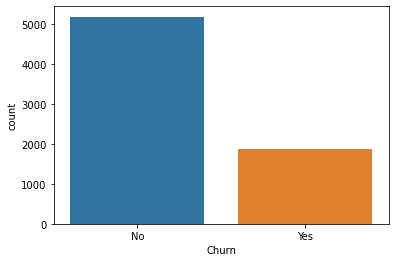

In [18]:
sns.countplot(df["Churn"])
df["Churn"].value_counts()

We can see that our target column churn has two classes and the classes are imbalanced

Churn is less compared to total count and churn count is 1869

Male      3555
Female    3488
Name: gender, dtype: int64

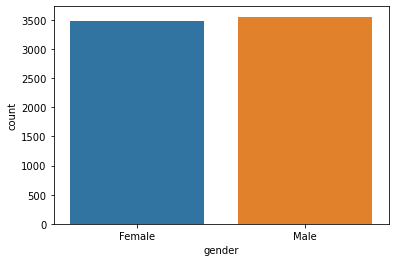

In [19]:
sns.countplot(df["gender"])
df["gender"].value_counts()

The number of male and female count is almost same 

Males are slightly greater in number when compared to females

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

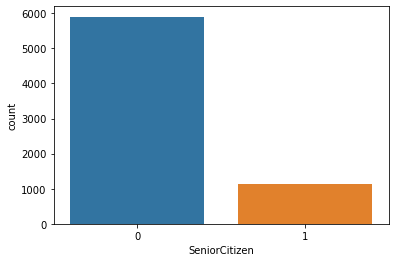

In [20]:
sns.countplot(df["SeniorCitizen"])
df["SeniorCitizen"].value_counts()

The number of senior citizens in this analysis is less (1142)

No     4933
Yes    2110
Name: Dependents, dtype: int64

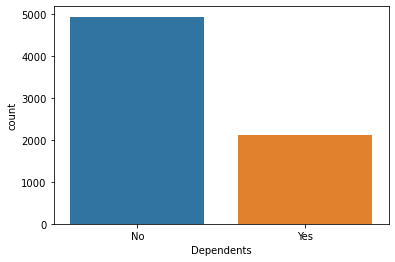

In [21]:
sns.countplot(df["Dependents"])
df["Dependents"].value_counts()

The number of dependents are less in number (2110)

There are many categorical columns , so lets form a loop for them separately and then analyze

In [22]:
# Separating binary columns

columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [23]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

Those these are the 7 columns "gender", "seniorcitizen", "partner", "dependents", "phoneservice", "paperlessbilling" and churn who have tow classes in them

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

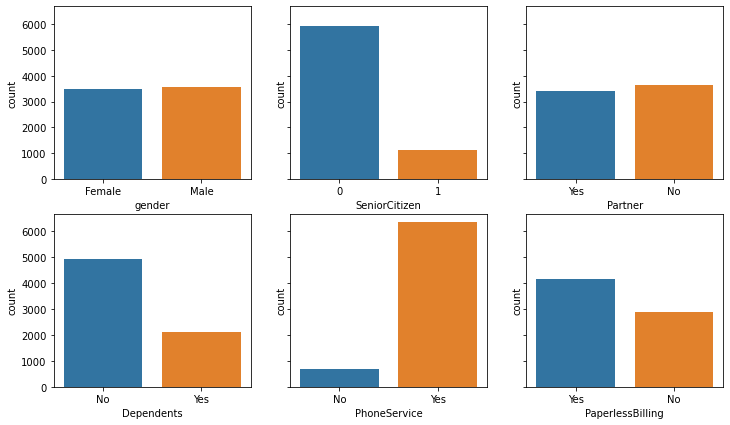

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

There is a high imbalance in SeniorCitizen and PhoneService variables. 

Most of the customers are not senior and similarly, most customers have a phone service.

<AxesSubplot:xlabel='tenure', ylabel='Density'>

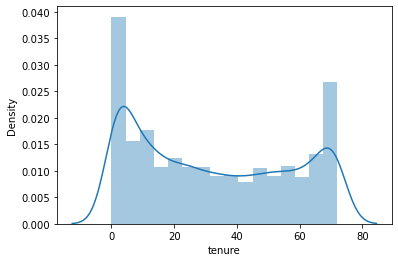

In [25]:
sns.distplot(df['tenure'])

Tenure is in the range of 0 to 72 . High count have tenure value 0 to 5

According to the distribution of tenure variable, most of the customers are either pretty new or have stayed for a long time with the company

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

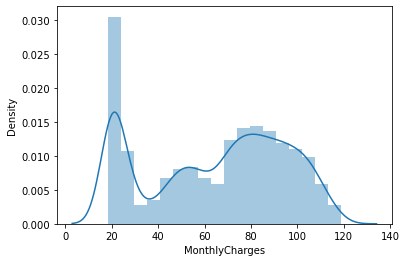

In [26]:
sns.distplot(df['MonthlyCharges'])

Shows the monthly charges

It is in the range of 18.25 to 118.75

A similar trend is seen on MonthlyCharges as that of tenure. There seems to be a gap between low rates and high rates

In [27]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
No,37.569965,61.265124
Yes,17.979133,74.441332


It is clear that people who have been a customer for a long time tend to stay with the company. 

The average tenure in months for people who left the company is 20 months less than the average for people who stay.

# Bi-variant Analysis

<AxesSubplot:xlabel='count', ylabel='gender'>

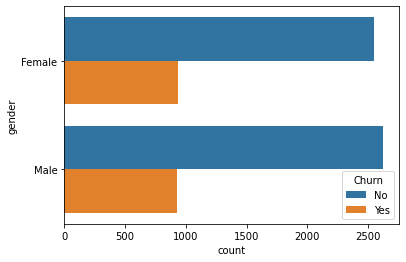

In [28]:
sns.countplot(y = "gender", hue = "Churn", data = df)

Equal no. of males and females are showing churn

<AxesSubplot:xlabel='count', ylabel='SeniorCitizen'>

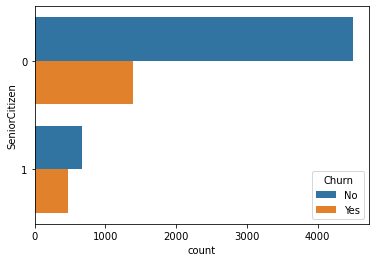

In [29]:
sns.countplot(y = "SeniorCitizen", hue = "Churn", data = df)

Few number of senior citizens  wish for churn bcoz most of them look for stability being senior citizens

<AxesSubplot:xlabel='count', ylabel='Dependents'>

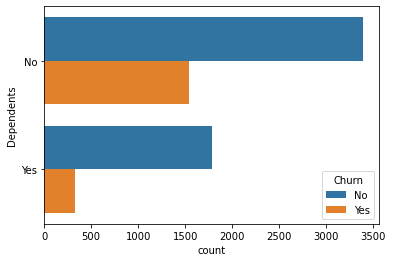

In [30]:
sns.countplot(y = "Dependents", hue = "Churn", data = df)

Few number of dependents prefer churn

<AxesSubplot:xlabel='count', ylabel='PhoneService'>

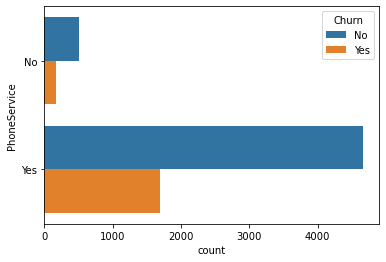

In [31]:
sns.countplot(y = "PhoneService", hue = "Churn", data = df)

Good number of people with phoneservice prefer churn

<AxesSubplot:xlabel='count', ylabel='InternetService'>

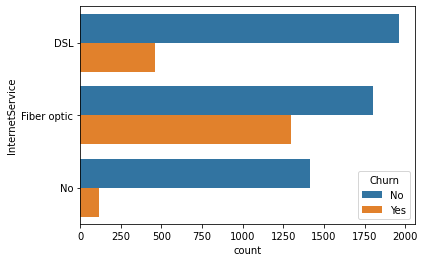

In [32]:
sns.countplot(y = "InternetService", hue = "Churn", data = df)

Internet service variable is definitely important in predicting churn rate.

As you can see, customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic. 

This company may have some problems with fiber optic connection. 

In [33]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

# Data Manipulation

From the above analysis we can see that few columns are not important for our predictions on Churn. Hence we can drop those columns

In [34]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [35]:
df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,No
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,No
7040,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check,29.60,No
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check,74.40,Yes


Columns are successfully dropped and the column values is updated to 16

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [37]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod','Churn']

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for i in cat_features:   
    df[i] = encoder.fit_transform(df[i]) 
df.dtypes

SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
Churn                 int32
dtype: object

Now all the categorical columns are encoded and the datatypes of all the columns are now identifiable and is either int or float

In [39]:
df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,0
1,0,0,0,34,0,0,2,0,2,0,0,0,0,3,56.95,0
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,1
3,0,0,0,45,1,0,2,0,2,2,0,0,0,0,42.30,0
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,0,2,2,2,2,1,3,84.80,0
7039,0,1,1,72,2,1,0,2,2,0,2,2,1,1,103.20,0
7040,0,1,1,11,1,0,2,0,0,0,0,0,1,2,29.60,0
7041,1,1,0,4,2,1,0,0,0,0,0,0,1,3,74.40,1


# Multi - Variant Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'SeniorCitizen'),
  Text(0, 1.5, 'Partner'),
  Text(0, 2.5, 'Dependents'),
  Text(0, 3.5, 'tenure'),
  Text(0, 4.5, 'MultipleLines'),
  Text(0, 5.5, 'InternetService'),
  Text(0, 6.5, 'OnlineSecurity'),
  Text(0, 7.5, 'OnlineBackup'),
  Text(0, 8.5, 'DeviceProtection'),
  Text(0, 9.5, 'TechSupport'),
  Text(0, 10.5, 'StreamingTV'),
  Text(0, 11.5, 'StreamingMovies'),
  Text(0, 12.5, 'PaperlessBilling'),
  Text(0, 13.5, 'PaymentMethod'),
  Text(0, 14.5, 'MonthlyCharges'),
  Text(0, 15.5, 'Churn')])

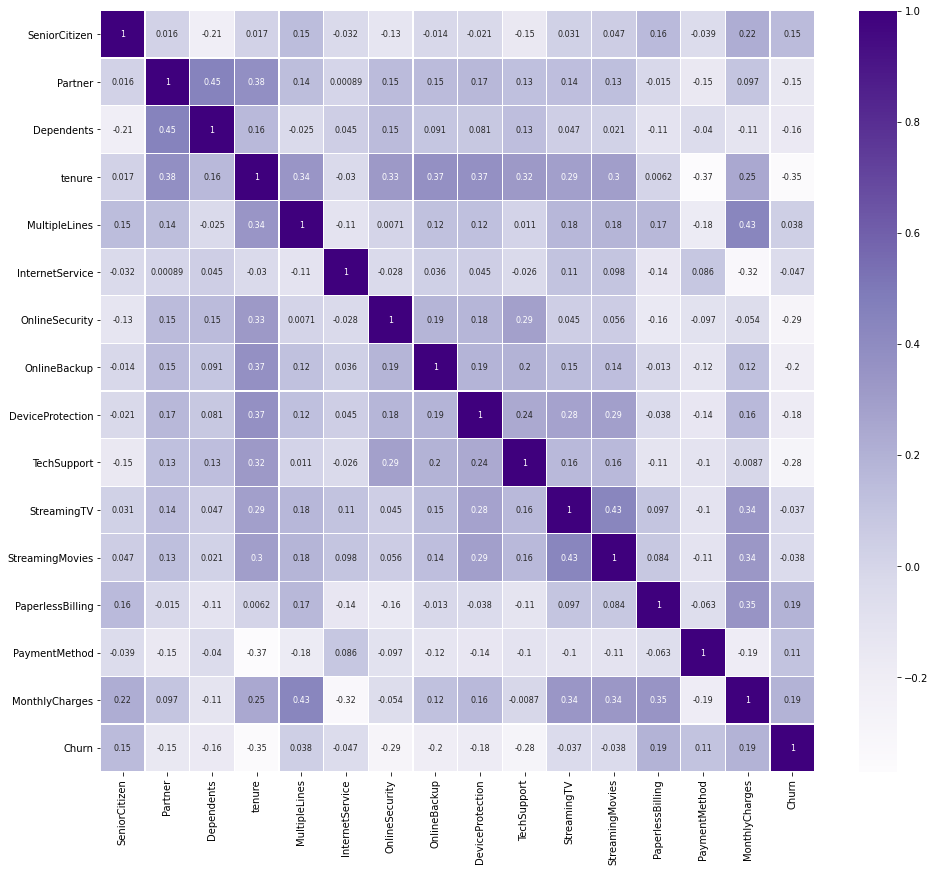

In [40]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.2,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)

From this heatmap we have got the correlation values

we can see that the column "Credit_History" has high correlation with the target column compared to all other columns

Tenure is an important column for predicting customer churn

In [41]:
cor = df.corr()
cor

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,0.156530,-0.038551,0.220173,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,-0.014877,-0.154798,0.096848,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.006152,-0.370436,0.247900,-0.352229
MultipleLines,0.146185,0.142410,-0.024991,0.343032,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.032310,0.000891,0.044590,-0.030359,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,-0.128221,0.150828,0.152166,0.325468,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,-0.157641,-0.096726,-0.053878,-0.289309
OnlineBackup,-0.013632,0.153130,0.091015,0.370876,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,-0.013370,-0.124847,0.119777,-0.195525
DeviceProtection,-0.021398,0.166330,0.080537,0.371105,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,-0.038234,-0.135750,0.163652,-0.178134
TechSupport,-0.151268,0.126733,0.133524,0.322942,0.011466,-0.026047,0.285028,0.195748,0.240593,1.000000,0.161305,0.161316,-0.113600,-0.104670,-0.008682,-0.282492


In [42]:
# This is the correlation values for our dataset which we saw visually using the heatmap

# We can see that the tenure has high correlation with our target variable i.e., Churn

In [43]:
# Representing which columns have positive and negative correlations with the target column

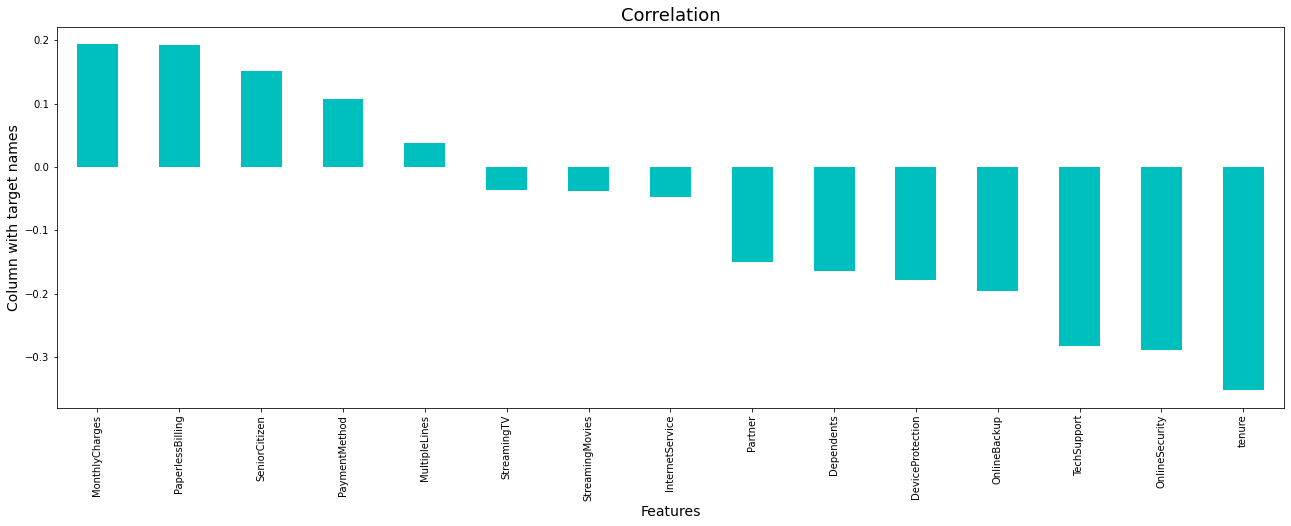

In [44]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(["Churn"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [45]:
# Checking for presence of outliers

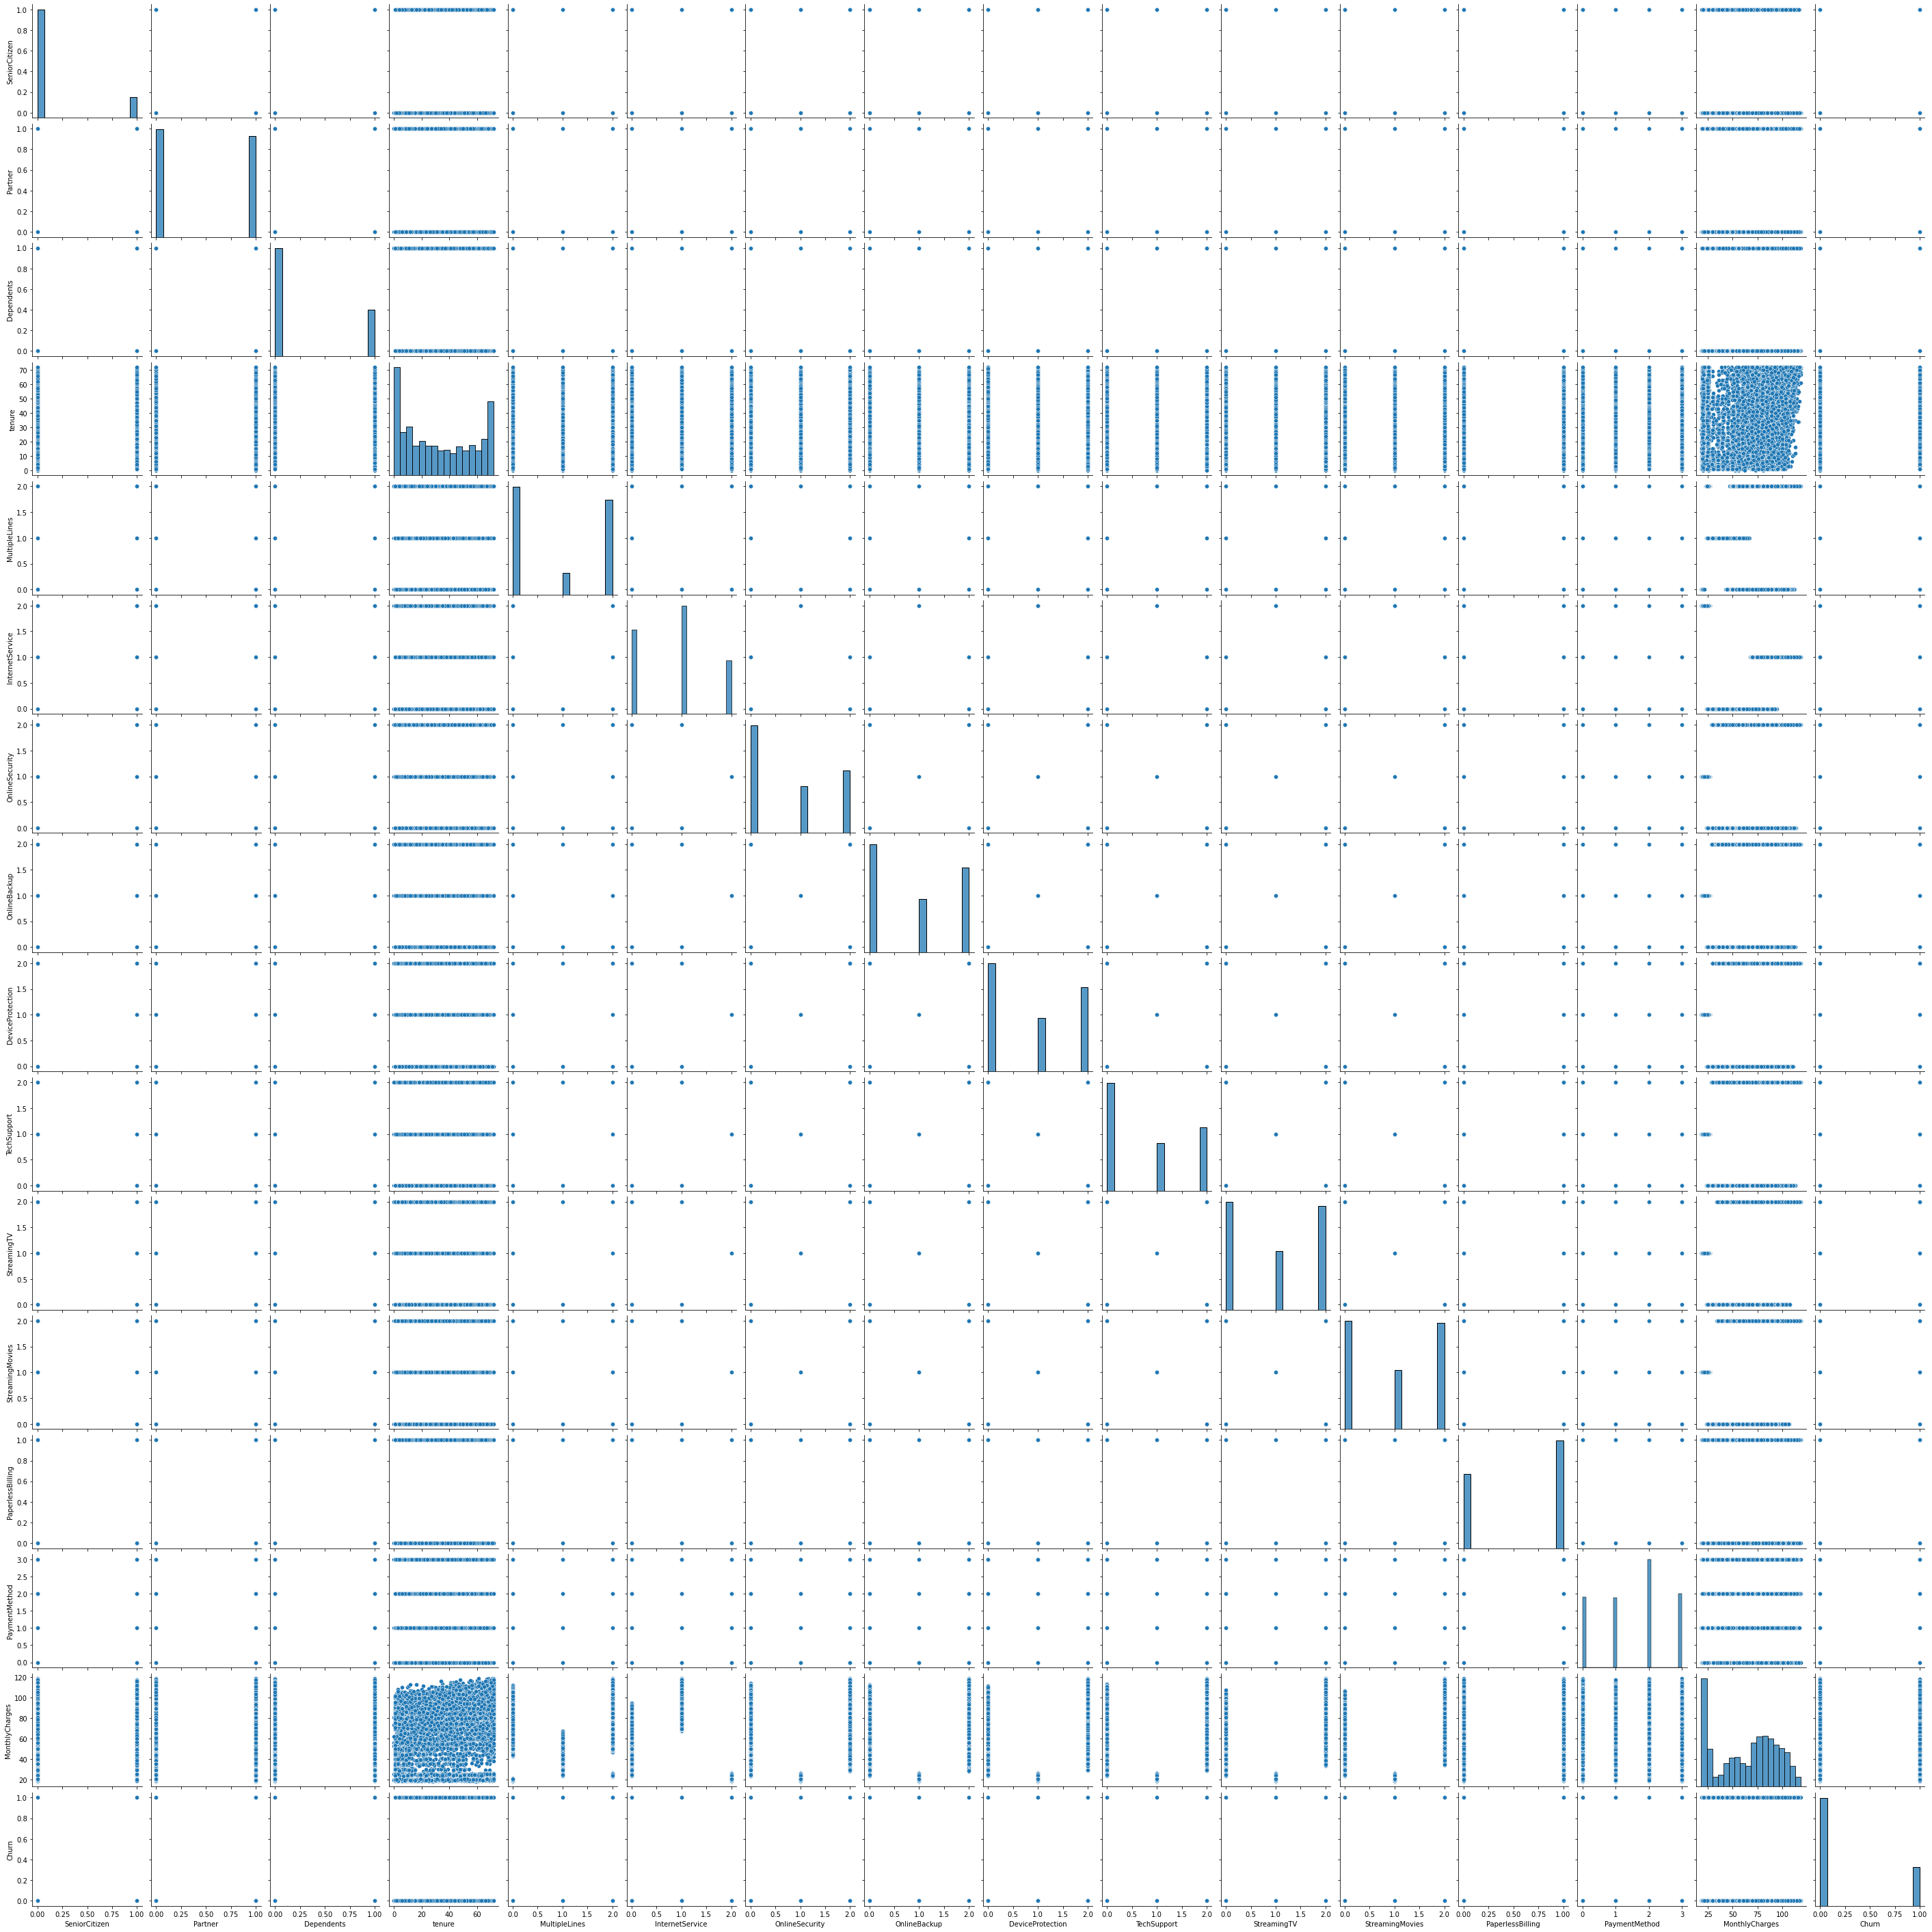

In [46]:
sns.pairplot(df)

No much outliers present, let's check for skewness

In [47]:
df.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='count'>

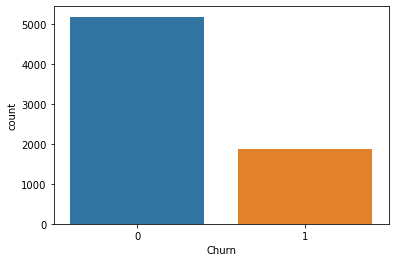

In [48]:
sns.countplot(df['Churn'])

Let's balance the class

In [49]:

# We need to split the data into X and y before we could try balancing the classes
# Splitting the dataset into X features and y label

X = df.drop(["Churn"],axis=1)
y = df["Churn"]

In [50]:
# Applying over-sampling to balance our classes

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [51]:
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

Now that our classes are balanced

#  Machine Learning Models

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30) 

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [55]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

pred1 =DTC.predict(X_test)
acc1=classification_report(y_test,pred1)
print(acc1)

#confusion matrix


cf_matrix = confusion_matrix(y_test, pred1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      1559
           1       0.76      0.70      0.73      1546

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105

[[1208  351]
 [ 459 1087]]


In [56]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# We are getting 75% Accuracy using DecisionTreeClassifier
# We can observe the confusion matrix as well

In [57]:
# Lets try to check the Accuracy using Random Forest
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)


pred1= RFC.predict(X_test)
acc1=classification_report(y_test,pred1)
print(acc1)

#confusion matrix

cf_matrix = confusion_matrix(y_test, pred1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1559
           1       0.81      0.79      0.80      1546

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105

[[1278  281]
 [ 319 1227]]


In [58]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by Random Forest Classifier is 83%
# We can observe the confusion matrix as well

In [59]:
# Let's try to check the Accuracy using SupportVectorClassifier
SV=SVC()
SV.fit(X_train,y_train)
pred1=SV.predict(X_test)
acc=classification_report(y_test,pred1)
print(acc)

#confusion matrix

cf_matrix = confusion_matrix(y_test, pred1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1559
           1       0.78      0.81      0.79      1546

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105

[[1201  358]
 [ 291 1255]]


In [60]:
#  I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by SupportVector Classifier is 81%
# We can observe the confusion matrix as well

In [61]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)

pred_sgd1 = sgd.predict(X_test)
acc1=classification_report(y_test,pred_sgd1)
print(acc1)  

#confusion matrix
cf_matrix = confusion_matrix(y_test, pred_sgd1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1559
           1       0.73      0.76      0.75      1546

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105

[[1125  434]
 [ 364 1182]]


In [62]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by SGD Classifier is 77%
# We can observe the confusion matrix as well

In [63]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train,y_train)

y_pred1 = logreg.predict(X_test)
acc1=classification_report(y_test,y_pred1)
print(acc1)   

#confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1559
           1       0.76      0.78      0.77      1546

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105

[[1169  390]
 [ 334 1212]]


In [64]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by Logistic Regression model is 78%
# We can observe the confusion matrix as well

In [65]:
# Let's try to check the Accuracy using XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50, max_depth=4) 
model.fit(X_train, y_train)


y_pred1=model.predict(X_test)
acc1=classification_report(y_test,y_pred1)
print (acc1)

# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

[14:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1559
           1       0.81      0.80      0.81      1546

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105

[[1268  291]
 [ 304 1242]]


In [66]:
# I have used classification report because it gives all the values of accuracy,precision, recall and f1-score
# Since the classes are balanced we can just take accuracy into consideration
# The accuracy score obtained by XGBClassifier model is 81%
# We can observe the confusion matrix as well

In [67]:
# All these accuracy score may also be due to overfitting, so just can't decide with the accuracy score
# 1) Lets find the cross validation score first 
# 2) lets find the difference of accuracy score and cross validation score

# The model with the least difference is the best model



In [68]:
print(cross_val_score(DTC,X,y,cv=5).mean())

0.7875985271421


In [69]:
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8364990905546099


In [70]:
print(cross_val_score(SV,X,y,cv=5).mean())

0.7492284307338839


In [71]:
print(cross_val_score(sgd,X,y,cv=5).mean())

0.7272047688094088


In [72]:
print(cross_val_score(logreg,X,y,cv=5).mean())

0.7634367462635687


In [73]:
print(cross_val_score(model,X,y,cv=5).mean())

[14:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [74]:
# The difference between the accuracy score and cross validation score for DTC is 3.55%
# The difference between the accuracy score and cross validation score for RFC is 0.456%
# The difference between the accuracy score and cross validation score for SVC is 5.61%
# The difference between the accuracy score and cross validation score for SGD is 19.57%
# The difference between the accuracy score and cross validation score for Logregression is 1.4%
# The difference between the accuracy score and cross validation score for XGB is 0.56%

 So from here our best model is Randon Forest Classifier but let's perform hyper-parameter tuning and then decide on best model

# Hyper-paramter tuning on all models

In [75]:
from sklearn.model_selection import GridSearchCV

print('model=',DecisionTreeClassifier)
param_grid = {"max_depth": [80, 90, 100, 110],
              "max_features": range(3,12,2),
              "min_samples_leaf": range(2,8)}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'max_depth': 110, 'max_features': 9, 'min_samples_leaf': 6}
0.7468599033816425
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1559
           1       0.78      0.68      0.73      1546

    accuracy                           0.75      3105
   macro avg       0.75      0.75      0.75      3105
weighted avg       0.75      0.75      0.75      3105


[[1268  291]
 [ 304 1242]]


In [ ]:
# The accuracy score using hyper-parameter tuning for DecisionTree Classifier is 75%

In [76]:
print('model=',RandomForestClassifier)
param_grid= {'bootstrap': [True],'max_depth': [80, 90, 100],
             'max_features':  range(3,12,2),
             'min_samples_leaf':range(2,8),
             'min_samples_split': [2,4,8, 10,],
             'n_estimators': [100, 150,200]}
grid=GridSearchCV(RandomForestClassifier(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= <class 'sklearn.ensemble._forest.RandomForestClassifier'>
{'bootstrap': True, 'max_depth': 100, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
0.8106280193236715
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1559
           1       0.82      0.80      0.81      1546

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105


[[1268  291]
 [ 304 1242]]


In [77]:
# The accuracy score using hyper-parameter tuning for RandomForest Classifier is 81%

In [79]:
print('model=',SVC)        
param_grid={ 'C':[0.1,1,10,100],
             'gamma':['scale','auto'],
             'kernel':['linear']}
grid=GridSearchCV(SVC(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= <class 'sklearn.svm._classes.SVC'>
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.7648953301127214
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1559
           1       0.75      0.80      0.77      1546

    accuracy                           0.76      3105
   macro avg       0.77      0.77      0.76      3105
weighted avg       0.77      0.76      0.76      3105


[[1268  291]
 [ 304 1242]]


In [80]:
# The accuracy score using hyper-parameter tuning for SupportVector Classifier is 76%

In [81]:
print('model=',sgd)
param_grid= {'loss':['hinge','log','modified_huber','squared_hinge','perceptron'],
            'penalty':['l1','l2','elasticnet'],
            'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000],
             'learning_rate':['constant','optimal','invscaling','adaptive'],
             'class_weight':[{1:0.5,0:0.5},{1:0.4,0:0.6},{1:0.6,0:0.4},{1:0.7,0:0.3}],
             'eta0':[1,10,100]
            }
grid=GridSearchCV(SGDClassifier(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= SGDClassifier(penalty=None)
{'alpha': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, 'eta0': 100, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l2'}
0.7658615136876007
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1559
           1       0.75      0.79      0.77      1546

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105


[[1268  291]
 [ 304 1242]]


In [82]:
# The accuracy score using hyper-parameter tuning for StochasticGradient Classifier is 77%

In [83]:
print('model=',XGBClassifier)
param_grid= {'max_depth':range(3,15,2),'min_child_weight':range(5,10)}
grid=GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)

model= <class 'xgboost.sklearn.XGBClassifier'>
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[16:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 7, 'min_child_weight': 8}
0.8025764895330113
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1559
           1       0.81      0.79      0.80      1546

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105

[[1268  291]
 [ 304 1242]]


In [84]:
# The accuracy score using hyper-parameter tuning for XGBClassifier is 80%

In [85]:
print('model=',logreg)
param_grid = {'penalty': ['l1','l2','elasticnet','none'],
             'C':[0.1,1,10,100],
            'solver':["netwon-cg","lbfgs","liblinear","sag","saga"]
             }
grid=GridSearchCV(LogisticRegression(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")


cf_matrix = confusion_matrix(y_test, y_pred1)
print(cf_matrix)


model= LogisticRegression(C=100000.0)
{'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
0.7668276972624799
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1559
           1       0.76      0.78      0.77      1546

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105


[[1268  291]
 [ 304 1242]]


In [86]:
# The accuracy score using hyper-parameter tuning for Logistic Regression is 77%

In [87]:
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for DTC is 0.03
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for RFC is 0.0624
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for SVC is 0.0108
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for SGD is 0.0128
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for Logregression is 0.0066
# The difference between the accuracy score after hyper-parameter tuning and cross validation score for XGB is 0.0173

# Our best model here for prediction of Customer Churn is Logistic Regression

# Saving the model

In [88]:
# Serializing or saving the model
# Importing the necessary library for saving the model
import joblib
joblib.dump(logreg,"FinalModel.pkl")

['FinalModel.pkl']

# Loading the model

In [89]:
mod=joblib.load("FinalModel.pkl")

In [90]:
print(mod.predict(X_test))

[1 0 1 ... 0 1 1]
